In [32]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [33]:
df = pd.read_csv("/Users/mrbinit/Downloads/bank.csv")

In [34]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [35]:
# from pandas_profiling import ProfileReport

In [36]:
# profile_report = ProfileReport(df)
# profile_report

In [37]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [38]:
def identify_categorical_columns(df):
    categorical_columns = []
    for col in df.columns:
        if df[col].dtype.name == "object":
            categorical_columns.append(col)
    return categorical_columns

def identify_date_time_columns(df):
    date_time_columns = []
    for col in df.columns:
        if pd.api.types.is_datetime_dtype(df[col]):
            date_time_columns.append(col)
    return date_time_columns

def handle_missing_values(df):
    # Impute missing values with the mean of the column.
    for col in df.columns:
        if df[col].isnull().any():
            df[col].fillna(df[col].mean(), inplace=True)
    return df

def handle_duplicates(df):
    # Drop duplicate rows.
    df.drop_duplicates(inplace=True)
    return df

def handle_outliers(df, threshold=3):
    # Identify outliers using the z-score method.
    for col in df.columns:
        if df[col].dtype.name in ["float64", "int64"]:
            df_z = df[col].apply(lambda x: (x - df[col].mean()) / df[col].std())
            df_outliers = df_z[abs(df_z) > threshold]
            df.drop(df_outliers.index, inplace=True)
    return df

def normalize_data(df):
    # Normalize the data using the MinMaxScaler.
    scaler = MinMaxScaler()
    df_norm = scaler.fit_transform(df)
    df_norm = pd.DataFrame(df_norm, columns=df.columns)
    return df_norm

def encode_data(df,categorical_columns):
    label=LabelEncoder()
    for i in categorical_columns:
        df[i]=label.fit_transform(df[i])
    return df

def handle_data(df):
    # Identify categorical columns.
    categorical_columns = identify_categorical_columns(df)
    # Identify date and time columns.
#     date_time_columns = identify_date_time_columns(df)
    # Handle missing values.
    df = encode_data(df, categorical_columns)
    df = handle_missing_values(df)
    # Handle duplicates.
    df = handle_duplicates(df)
    # Handle outliers.
    df = handle_outliers(df)
    # Normalize the data.
    df = normalize_data(df)
    # Encode categorical data.
    # Handle date and time data.
#     df = handle_date_time(df, date_time_columns)
    # Handle imbalance.
#     df = handle_imbalance(df, target_column)
    return df

In [39]:
df1=handle_data(df)

In [40]:
df1.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,0.706897,0.000000,0.5,0.333333,0.0,0.393860,1.0,0.0,1.0,0.133333,0.727273,0.734982,0.000000,0.0,0.0,1.0,1.0
1,0.396552,0.818182,0.5,0.333333,0.0,0.315613,1.0,0.0,1.0,0.133333,0.727273,0.980212,0.000000,0.0,0.0,1.0,1.0
2,0.637931,0.636364,0.5,0.333333,0.0,0.403559,1.0,0.0,1.0,0.133333,0.727273,0.407774,0.000000,0.0,0.0,1.0,1.0
3,0.620690,0.000000,0.5,0.666667,0.0,0.236418,0.0,0.0,1.0,0.133333,0.727273,0.474205,0.111111,0.0,0.0,1.0,1.0
4,0.413793,0.363636,1.0,0.666667,0.0,0.223000,1.0,1.0,1.0,0.133333,0.727273,0.395760,0.111111,0.0,0.0,1.0,1.0
5,0.655172,0.363636,0.5,0.666667,0.0,0.283527,1.0,1.0,1.0,0.166667,0.727273,0.847350,0.000000,0.0,0.0,1.0,1.0
6,0.724138,0.454545,0.0,0.333333,0.0,0.262743,1.0,0.0,1.0,0.166667,0.727273,0.726502,0.000000,0.0,0.0,1.0,1.0
7,0.327586,0.818182,0.5,0.333333,0.0,0.223073,1.0,0.0,1.0,0.166667,0.727273,0.428269,0.000000,0.0,0.0,1.0,1.0
8,0.172414,0.636364,1.0,0.333333,0.0,0.594181,1.0,0.0,1.0,0.166667,0.727273,0.915194,0.222222,0.0,0.0,1.0,1.0
9,0.344828,0.000000,1.0,0.333333,0.0,0.230292,1.0,0.0,1.0,0.200000,0.727273,0.554064,0.000000,0.0,0.0,1.0,1.0


In [41]:
X = df1.drop(['deposit'], axis=1)

y = df1['deposit']


In [42]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [43]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((7942, 16), (1986, 16))

### RUN SVM with default parameters

In [44]:
#Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters.



from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

svc = SVC()


svc.fit(X_train, y_train)

# y_pred = svc.predict(X_test)

# compute and print accuracy score
# print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

print('train accuracy from the default model : {0:0.4f}'.format(svc.score(X_train, y_train)))
print("test accuracy from the default model : {0:0.4f} ".format(svc.score(X_test, y_test)))



train accuracy from the default model : 0.8303
test accuracy from the default model : 0.8117 


first model has the accuracy of 0.83 in the train set and 0.81 in the test set . So now performing the feature selection. 

### Feature selection

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
accuracy_list_train = []
k=np.arange(1,17,1)
for each in k:
    x_new = SelectKBest(f_classif, k=each).fit_transform(X_train, y_train)
    svc.fit(x_new,y_train)
    accuracy_list_train.append(svc.score(x_new,y_train))   


d = {'best features number': k, 'train_score': accuracy_list_train}
df = pd.DataFrame(data=d)
print("max accuracy:",df["train_score"].max())
print("max accuracy id:",df["train_score"].idxmax())

max accuracy: 0.831528582221103
max accuracy id: 14


In [46]:
# d = {'best features number': k, 'train_score': accuracy_list_train}
# df = pd.DataFrame(data=d)
# print("max accuracy:",df["train_score"].max())
# print("max accuracy id:",df["train_score"].idxmax())

In [47]:
print(" max accuracy values: \n", df.iloc[4])

 max accuracy values: 
 best features number    5.000000
train_score             0.784185
Name: 4, dtype: float64


In [48]:
selector = SelectKBest(f_classif, k = 5)
x_new = selector.fit_transform(X_train, y_train)
x_new_test=selector.fit_transform(X_test,y_test)
names_train = X_train.columns.values[selector.get_support()]
names_test = X_test.columns.values[selector.get_support()]
print("x train features:",names_train)
print("x test features:",names_test)

x train features: ['housing' 'loan' 'contact' 'duration' 'previous']
x test features: ['housing' 'loan' 'contact' 'duration' 'previous']


### MODEL with GridSearchCV

In [49]:
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

# initiate classifier with default hyperparameter with kernal = rbf ,C = 1.0, and gamma = auto

svc = SVC()

# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]}
              ]

grid_search = GridSearchCV(estimator = svc, 
                           param_grid= parameters,
                           scoring = 'accuracy', 
                           cv = 5,
                           verbose=0)

grid_search.fit(x_new, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [50]:
# examine the best model


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.7870


Parameters that give the best results : 

 {'C': 1000, 'gamma': 0.9, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=1000, gamma=0.9)


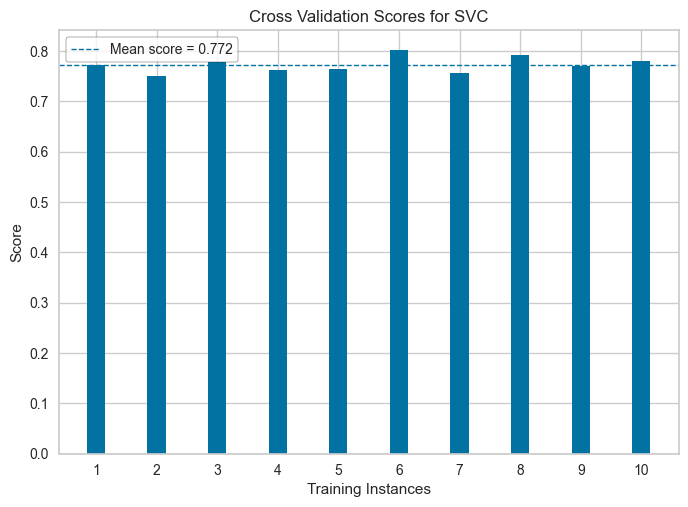

<Axes: title={'center': 'Cross Validation Scores for SVC'}, xlabel='Training Instances', ylabel='Score'>

In [51]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores
_, ax = plt.subplots()

# Create a cross-validation strategy
cv = StratifiedKFold(10)

# Create the cv score visualizer
oz = CVScores(
    SVC(C=2,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1), ax=ax, cv=cv, scoring='accuracy'
)
oz.fit(x_new, y_train)
oz.poof()


In [52]:
#Default hyperparameter means C=1000.0, kernel=rbf and gamma=auto among other parameters.


svc = SVC(C = 1000.0)


svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with rbf kernal and C = 100.0: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernal and C = 100.0: 0.7875


in these case the accuracy reduces with C = 1000.00

### Run SVM with linear kernel

In [53]:
linear_svc = SVC(kernel='linear', C = 1.0)

linear_svc.fit(X_train, y_train)

y_pred_test = svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.7875


In [54]:
linear_svc_100 = SVC(kernel='linear', C = 100.0)

linear_svc_100.fit(X_train, y_train)

y_pred = linear_svc_100.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.7996


In [55]:
linear_svc_1000 = SVC(kernel='linear', C = 1000.0)

linear_svc_1000.fit(X_train, y_train)

y_pred = linear_svc_1000.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.7996


### comparing train and test set accuracy


In [56]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train


array([0., 0., 1., ..., 1., 0., 1.])

In [57]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


Training-set accuracy score: 0.8012


### checking over fitting and underfitting

In [58]:
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.8012
Test set score: 0.8006


The training-set accuracy score is 0.8283 while the test-set accuracy to be 0.8167. These two values are quite comparable. So, there is no question of overfitting.

### compare model accuracy with null accuracy

In [59]:
# y_test_series = pd.Series(y_test)
# y_test_series.value_counts()

# check class distribution in test set

y_test.value_counts()

0.0    1091
1.0     895
Name: deposit, dtype: int64

in these, we can see that occurance of most frequent class 0 is 1068. So, we can calculate null accuracy by dividing 1068 by total number of occurences.



In [60]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k = 5)
x_new = selector.fit_transform(X_train, y_train)
x_new_test=selector.fit_transform(X_test,y_test)
names_train = X_train.columns.values[selector.get_support()]
names_test = X_test.columns.values[selector.get_support()]
print("x train features:",names_train)
print("x test features:",names_test)


x train features: ['housing' 'loan' 'contact' 'duration' 'previous']
x test features: ['housing' 'loan' 'contact' 'duration' 'previous']


In [61]:
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

# initiate classifier with default hyperparameter with kernal = rbf ,C = 1.0, and gamma = auto

svc = SVC()

# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
              ]

grid_search = GridSearchCV(estimator = svc, 
                           param_grid= parameters,
                           scoring = 'accuracy', 
                           cv = 5,
                           verbose=0)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [62]:
# examine the best model


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8184


Parameters that give the best results : 

 {'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=1, gamma=0.9)


### RUN SVM with Polynomial kernel

RUN SVM with Polynomial kernel with C = 1.0

In [63]:
poly_svc = SVC(kernel = 'poly', C = 1.0)

poly_svc.fit(X_train, y_train)
# make predictions on test set
y_pred=poly_svc.predict(X_test)

print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.8117


RUN SVM with Polynomial kernel with C = 100.0

In [64]:
poly_svc_100 = SVC(kernel = 'poly', C = 100.0)
poly_svc_100.fit(X_train, y_train)
y_pred = poly_svc_100.predict(X_test)
print("Module accuracy score with polynomial kernel and C = 100.0 : {0: 0.4f}". format(accuracy_score(y_test, y_pred)))


Module accuracy score with polynomial kernel and C = 100.0 :  0.7986


RUN SVM with Polynomial kernel with C = 1000.0

### confusion matrix

In [65]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[870 221]
 [201 694]]

True Positives(TP) =  870

True Negatives(TN) =  694

False Positives(FP) =  221

False Negatives(FN) =  201


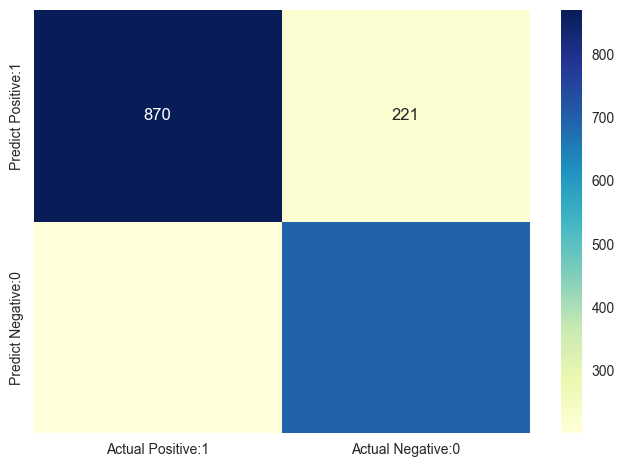

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt


# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.show()

### Classification matrics

classification report

In [67]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.81      0.80      0.80      1091
         1.0       0.76      0.78      0.77       895

    accuracy                           0.79      1986
   macro avg       0.79      0.79      0.79      1986
weighted avg       0.79      0.79      0.79      1986



classification accuracy

In [68]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [69]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7875


classification error

In [70]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2125


ROC CURVE

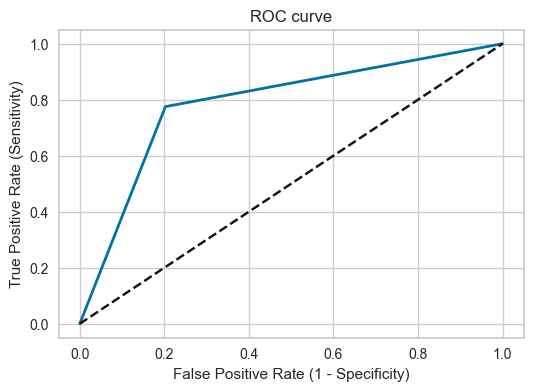

In [71]:
# plot ROC Curve

from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)


plt.figure(figsize=(6,4))


plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()




In [72]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))


ROC AUC : 0.7864


ROC AUC
ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. It is a technique to compare classifier performance. In this technique, we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

### comment

ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in classifying the pulsar star.

In [73]:
# calculate cross-validated ROC AUC

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))


Cross validated ROC AUC : 0.8702


### Stratified k-fold Cross Validation with shuffle split

In [74]:
from sklearn.model_selection import KFold


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


linear_svc=SVC(kernel='linear')


linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)


In [75]:
#print cross-validation scores with linear kernel

print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

Stratified cross-validation scores with linear kernel:

[0.80060423 0.79959718 0.80060423 0.80554156 0.79193955]


In [76]:
# print average cross-validation score with linear kernel

print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Average stratified cross-validation score with linear kernel:0.7997


### stratified k-fold cross validation with shuffle split with rbf kernel

In [77]:
rbf_svc=SVC(kernel='rbf')


rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

In [78]:
# print cross-validation scores with rbf kernel

print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))


Stratified Cross-validation scores with rbf kernel:

[0.8121853  0.806143   0.81722054 0.82619647 0.81108312]


In [79]:
# print average cross-validation score with rbf kernel

print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))


Average stratified cross-validation score with rbf kernel:0.8146


I obtain higher average stratified k-fold cross-validation score of 0.7997 with linear kernel but the model accuracy is 0.7875. So, stratified cross-validation technique does not help to improve the model performance

### Hyperparameter Optimization using GridSearch CV

In [80]:
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

# initiate classifier with default hyperparameter with kernal = rbf ,C = 1.0, and gamma = auto

svc = SVC()

# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]}
              ]

grid_search = GridSearchCV(estimator = svc, 
                           param_grid= parameters,
                           scoring = 'accuracy', 
                           cv = 5,
                           verbose=0)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [81]:
# examine the best model


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8184


Parameters that give the best results : 

 {'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=1, gamma=0.9)


In [82]:
print('Grid search CV score on test set: {0:.4f}'.format(grid_search.score(X_test, y_test)))

Grid search CV score on test set: 0.8117


### Result and Conclusion



There are no outliers in our dataset. So, as I increase the value of C to limit fewer outliers, the accuracy doesnt increase. This is true with different kinds of kernels.

We get maximum accuracy with rbf with C=100.0 and the accuracy is 0.8133. So, we can conclude that our model is doing a very good job in terms of predicting the class labels. But, this is not true. Here, we have an imbalanced dataset. Accuracy is an inadequate measure for quantifying predictive performance in the imbalanced dataset problem. So, we must explore confusion matrix that provide better guidance in selecting models.

ROC AUC of our model is close to 1. So, we can conclude that our classifier does a good job in classifying the deposit.

I obtain higher average stratified k-fold cross-validation score of 0.7954 with linear kernel but the model accuracy is 0.7981. So, stratified cross-validation technique does not help to improve the model performance.

Our original model test accuracy is 0.7981 while GridSearch CV score on test-set is 0.8150. So, GridSearch CV helps to identify the parameters that will improve the performance for this particular model.

In [83]:
svc = SVC(kernel = 'rbf', C = 1.0, gamma=0.9)

svc.fit(X_train, y_train)
# make predictions on test set
y_pred=svc.predict(X_test)


print('Model accuracy score with rbf kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1.0 : 0.8117
